In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import os
np.random.seed(42)
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import json
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import pyproj
import pickle as pkl
import geojson
import cv2
from PIL import Image, ImageEnhance
import sys
from datetime import datetime
from datetime import timedelta
from pyhdf.SD import SD, SDC
import subprocess
import rasterio
import math

os.getcwd()

'/Users/sarah/Satellite_Image_Processing'

In [6]:
my_current_image_path = '../Desktop/hello'
under

1347


In [7]:
dates = set()
# for f in sorted(listdir(my_current_image_path)):
    
for f in sorted(listdir(my_current_image_path))[1:]:
    date = f.split('_')[0]
#     print(date)
    if date in dates:
        os.remove(os.path.join(my_current_image_path, f))
    else:
        dates.add(date)
        
print(len(sorted(listdir(my_current_image_path))))


194


In [35]:
dates

{'20190604',
 '20190605',
 '20190607',
 '20190611',
 '20190612',
 '20190613',
 '20190616',
 '20190617',
 '20190620',
 '20190621',
 '20190622',
 '20191002',
 '20191106',
 '20191110',
 '20191113',
 '20191120',
 '20191127',
 '20191128',
 '20191129',
 '20191203',
 '20191209',
 '20191211',
 '20191212',
 '20191213',
 '20191219',
 '20191220',
 '20191223',
 '20191226',
 '20191227',
 '20191228',
 '20191231',
 '20200102',
 '20200107',
 '20200108',
 '20200109',
 '20200110',
 '20200111',
 '20200114',
 '20200115',
 '20200117',
 '20200118',
 '20200204',
 '20200219',
 '20200221',
 '20200227',
 '20200302',
 '20200323',
 '20200331',
 '20200430',
 '20200503',
 '20200508',
 '20200523',
 '20200524',
 '20200525',
 '20200527',
 '20200609',
 '20200801',
 '20200909',
 '20200912',
 '20200913',
 '20201001',
 '20201006',
 '20201009',
 '20201012',
 '20201018',
 '20201028',
 '20201103',
 '20201108',
 '20201110',
 '20201112',
 '20201113',
 '20201114',
 '20201116',
 '20201117',
 '20201119',
 '20201120',
 '20201121',

In [14]:

#CRITICAL: Getting rid of file names that have a random charachers
#common with PlanetLab images downloads

#enter image directory 
# my_current_image_path ='Desktop/smokeymountain'
print(len(sorted(listdir(my_current_image_path))))

for f in sorted(listdir(my_current_image_path)):
#prints combined file path of ALL images
#     print(os.path.join(my_current_image_path, f))
    if f != ".DS_Store":
#prints file alone
#         print(f)

    # extract the spot in the file name that has these extra charchters
        name = f.split('_')[2]
        print(name)


    #here is where we rename the files. these charchters are never more than 3 charchters so,
        if len(name) < 4:
    #         print(f)
#             print(f[:16] + f[16+len(name)+1:])
    ##renaming the file without the extra charchters (using the len function)
            g = f[:16] + f[16+len(name)+1:]
#             print(g)
    #         ##MAKE SURE YOU HAVE A COPY OF YOUR DIRECTORY BEFORE RUNNIGN THIS LINE!!
            os.rename(os.path.join(my_current_image_path, f), 
                        os.path.join(my_current_image_path, g))


1347
1039
101e
101e
101c
101c
0e0e
0f3d
0f3d
1022
1003
0c81
0c81
0f47
1004
0c43
1010
1050
1050
1034
0f17
0f46
0f22
102c
0c76
0c76
0f2e
0f35
0f35
0f4d
0f4d
1006
0f36
1
20180206_045107_0f36_3B_Visual.tif
1035
0f44
0c59
1030
0f25
0f3b
0c59
1048
1021
1021
100d
100d
0c59
1
20180217_085433_0c59_3B_Visual.tif
1039
1040
1040
101c
0e0f
1025
1051
0f4c
0f47
1014
1014
100e
100e
0f1a
0f1a
100a
0f25
0e26
100c
100c
0f2d
1040
1040
104d
102f
102f
1042
101b
101b
0f49
1014
1014
100e
100a
0f25
0f3b
0e26
104b
100c
1040
1040
1043
1025
0f06
1042
1042
101b
1021
1021
0f2b
0f2b
0e0f
1027
1027
0f43
0f43
0f33
1029
1029
0f34
0f34
0f15
0f35
1006
0f28
0f51
1010
1005
103b
103b
1020
1020
102c
0f44
1012
1048
1018
1018
104a
104a
1015
1004
1004
1009
1044
1044
1011
0f32
0f32
103c
0f49
0f52
1039
1043
1040
1040
0f3d
1050
1
20180514_043640_0f1a_3B_Visual.tif
1025
0f43
0f2b
0f34
1049
1049
1009
0f2a
1044
1044
0f17
0f29
1014
1014
0f25
0f42
100d
100d
1010
0f06
1005
1005
1034
1034
0e20
1011
1011
1001
1001
101e
1003
1010
1018
103f

In [11]:
my_current_image_path = '../OneDrive \-\ Duke Univeristy/Mumbai/Bandra'
for f in sorted(listdir(my_current_image_path)):
    print(f)

FileNotFoundError: [Errno 2] No such file or directory: '../OneDrive \\-\\ Duke Univeristy/Mumbai/Bandra'

In [25]:
!ls ../OneDrive - Duke University

ls: -: No such file or directory
ls: ../OneDrive: No such file or directory
ls: Duke: No such file or directory
ls: University: No such file or directory


8921 4321


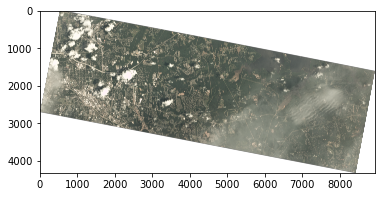

In [6]:
# Opens a image in RGB mode
im = Image.open("20180611_152714_0e16_3B_Visual.tif")
# PROJECT_SAVE_DIR = 'croppedoo_images'
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size


print(width, height)
# # Setting the points for cropped image
# left = 126
# top = 126
# right = 350
# bottom = 350

# # print(left,top,right,bottom)
# # Cropped image of above dimension
# # (It will not change original image)
# im1 = im.crop((left, top, right, bottom))
 
# # Shows the image in image viewer
# plt.imshow(im1)
# plt.show()
plt.imshow(im)
plt.show()
# width2, height2= im1.size
# print(width2, height2)

# ** `width` and `height` must be determined from viewing most common width and height. I manually change these numbers for each city, as the dimensions change city to city. 

In [14]:
def image_cropping(main_directory, cropped_img_folder_name):
    #make directory for newly cropped images
    PROJECT_ROOT_DIR = main_directory
    PROJECT_SAVE_DIR = cropped_img_folder_name
    if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
        print('Figure directory didn''t exist, creating now.')
        os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
    else:
        print('Figure directory exists.') 
        
    #got to delete images with improper amounts of data.
    new_dir = PROJECT_ROOT_DIR+'/'+ PROJECT_SAVE_DIR
    for f in sorted(listdir(PROJECT_ROOT_DIR)):
#         print(f)
        if f.endswith(".tif"): 
#             print(f[:-4])
            im = Image.open(os.path.join(PROJECT_ROOT_DIR,f))
            width, height = im.size
            print(width,height)
            img_arr = np.array(im)
            black_space = np.mean(img_arr[:,:,:]/255)
#             if (width == 476 and height == 476) and black_space > 0.5 and black_space < 0.9:
#                 print(black_space)
            plt.imshow(im)
                plt.show()
            left = 126
            top = 126
            right = 350
            bottom = 350
            im1 = im.crop((left, top, right, bottom))
            width2, height2 = im1.size
            print(width2, height2)
            plt.imshow(im1)
            plt.show()

#                 im1.save(new_dir+'/'+str(f))

#             

Figure directory exists.
8999 4477
224 224


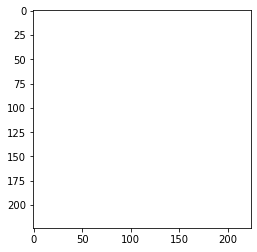

8901 4438
224 224


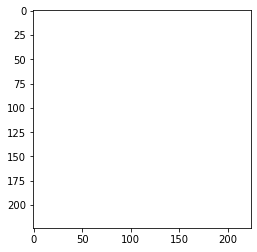

8993 4466
224 224


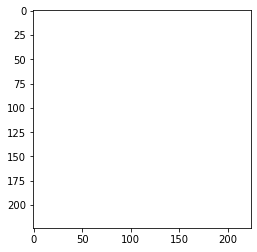

8995 4462
224 224


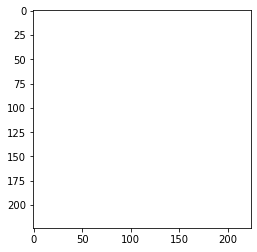

8218 3903
224 224


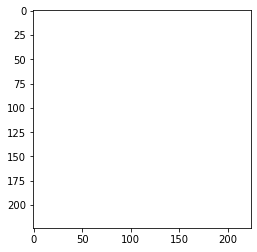

8853 4423


KeyboardInterrupt: 

In [15]:
image_cropping('../Desktop/smokeymountain', 'cropped_images')